<IPython.core.display.Javascript object>


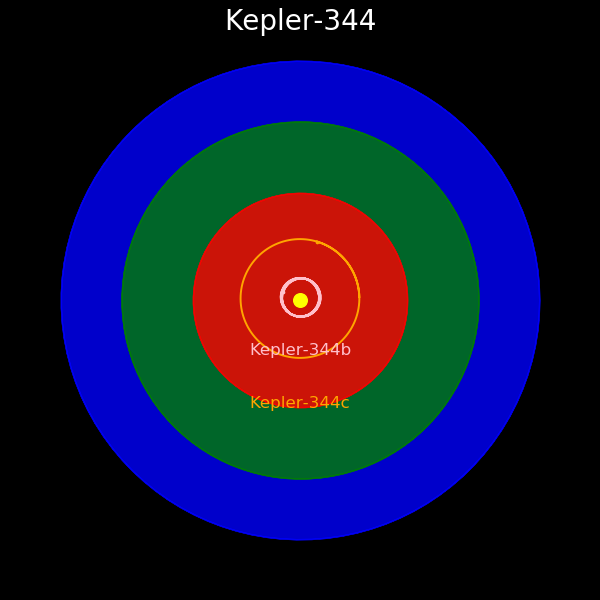

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from astropy.time import Time

# imports
import matplotlib.pyplot as plt
import numpy as np
import random 
import pandas as pd
from random import sample

# Setting up dataframe
exoplanetdata = pd.read_csv('dataexoplanet.csv', skiprows = 18) 
exoplanetdata['st_lum'] = exoplanetdata['st_lum'].fillna(0) # Changing nan to 0 for eaiser indexing
exoplanetdata['pl_orbsmax'] = exoplanetdata['pl_orbsmax'].fillna(0) # Changing nan to 0 for eaiser indexing
exoplanetdata['pl_radj'] = exoplanetdata['pl_radj'].fillna(0.25) # Changing nan to 0 for eaiser indexing
exoplanetdata['st_rad'] = exoplanetdata['st_rad'].fillna(1) # Changing nan to 1 for eaiser indexing
exoplanetdata['st_teff'] = exoplanetdata['st_teff'].fillna(4920) # Changing nan to 4920 K for eaiser indexing
exoplanetdata['pl_orbper'] = exoplanetdata['pl_orbper'].fillna(50) # Changing nan to 50 days for eaiser indexing
exoplanetdata['pl_orbeccen'] = exoplanetdata['pl_orbeccen'].fillna(0) # Changing nan to 0 for eaiser indexing
exoplanetdata['st_mass'] = exoplanetdata['st_mass'].fillna(1) # Changing nan to 0 for eaiser indexing
exoplanetdata['pl_bmassj'] = exoplanetdata['pl_bmassj'].fillna(0.5) # Changing nan to 0 for eaiser indexing
exoplanetdata = exoplanetdata.set_index('pl_hostname') 

sim_start_date = 0     # simulating a solar system starting from this date
sim_duration =  150                # (int) simulation duration in days


class Object:                   # define the objects
    def __init__(self, name, rad, color, r, v):
        self.name = name
        self.r    = np.array(r, dtype=np.float)
        self.v    = np.array(v, dtype=np.float)
        self.xs = []
        self.ys = []
        self.plot = ax.scatter(r[0], r[1], color=color, s=rad**2, edgecolors=None, zorder=10)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)

class SolarSystem:
    def __init__(self, thesun):
        self.thesun = thesun
        self.planets = []
        self.time = None
    def add_planet(self, planet):
        self.planets.append(planet)
    def evolve(self):           # evolve the trajectories
        dt = 1.0
        self.time += dt
        plots = []
        lines = []
        for p in self.planets:
            p.r += p.v * dt
            acc = -2.959e-4 * p.r / np.sum(p.r**2)**(3./2)  # in units of AU/day^2
            p.v += acc * dt
            p.xs.append(p.r[0])
            p.ys.append(p.r[1])
            p.plot.set_offsets(p.r[:2])
            p.line.set_xdata(p.xs)
            p.line.set_ydata(p.ys)
            plots.append(p.plot)
            lines.append(p.line)
        return plots + lines 

Star_name = exoplanetdata.sample(1)
Star_name = Star_name.index[0]
# Locate star in dataframe
Kepler_star_data = exoplanetdata.loc[[Star_name]]


Star_Luminosity = []

if Kepler_star_data['st_lum'].iloc[0] == 0: 
    Star_Luminosity.append((Kepler_star_data['st_rad'].iloc[0]**2)*((Kepler_star_data['st_teff'].iloc[0]/5778)**4))

else:
    Star_Luminosity.append(10**(Kepler_star_data['st_lum'].iloc[0])) 

Star_Luminosity = str(Star_Luminosity)
Star_Luminosity =  Star_Luminosity.strip('[').strip(']')
Star_Luminosity = round(float(Star_Luminosity),3)

planet_axes_list = []
for i in range(len(Kepler_star_data['pl_orbsmax'])):
    if Kepler_star_data['pl_orbsmax'].iloc[i] == 0:
        planet_axes_list.append(round(((Kepler_star_data['pl_orbper'].iloc[i]/(365))**2)**(1/3),3)) # Based off T^2 = a^3 - nice approx. for now 
    
    else:
        planet_axes_list.append(round(Kepler_star_data['pl_orbsmax'].iloc[i],3))
planet_axes_list = sorted(planet_axes_list, key = lambda x:float(x))
    
    
Lsun = 1.0 # Luminosity of Sun (in Solar units)
d_inner = round(0.9*(np.sqrt(Star_Luminosity/Lsun)),3)
d_outer = round(1.5*(np.sqrt(Star_Luminosity/Lsun)),3)
    
planet_index = ['b','c','d','e','f','g','h','i','j','k']
planet_index_rows = []
for i in range(len(planet_axes_list)):
        index = Star_name + planet_index[i]
        planet_index_rows.append(index)
        
        # Eccentricity
Eccen = []
for i in range(len(planet_axes_list)):
    Eccen.append(Kepler_star_data['pl_orbeccen'].iloc[i])
                

semi_minor = []
for i in range(len(planet_axes_list)):
    semi_minor.append(round(planet_axes_list[i]*np.sqrt(1-Eccen[i]),3))
                
Planet_temp = []
A = 0.3 # albedo
for i in planet_axes_list:
    planet_temp = Kepler_star_data['st_teff'].iloc[0]*((Kepler_star_data['st_rad'].iloc[0]/(2*i*215.032))**(1/2)*(1-A)**(1/4))
    Planet_temp.append(round(planet_temp,2))
        
    
plt.style.use('dark_background')
fig = plt.figure(figsize=[6, 6])
plt.style.use('dark_background')

if len(planet_axes_list) > 1 and planet_axes_list[-1] > d_outer:
    
    ax = plt.axes([0., 0., 1., 1.], xlim=(-planet_axes_list[-1]-1, planet_axes_list[-1]+1), ylim=(-planet_axes_list[-1]-1, planet_axes_list[-1]+1))
    title = ax.text(0, (planet_axes_list[-1]+1)*0.9, Star_name, fontsize=20, ha = 'center')

elif len(planet_axes_list) > 1 and planet_axes_list[-1] < d_outer:
    
    ax = plt.axes([0., 0., 1., 1.], xlim=(-d_outer-1, d_outer+1), ylim=(-d_outer-1, d_outer+1))
    title = ax.text(0, (d_outer+1)*0.9, Star_name, fontsize=20, ha = 'center')

else:
    
    ax = plt.axes([0., 0., 1., 1.], xlim=(-d_outer-1, d_outer+1), ylim=(-d_outer-1, d_outer+1))
    title = ax.text(0, (d_outer+1)*0.9, Star_name, fontsize=20, ha = 'center')

ax = ax   
ax.set_aspect('equal')
ax.axis('off')
ss = SolarSystem(Object(Star_name, Kepler_star_data['st_rad'].iloc[0]*10, 'yellow', [0, 0, 0], [0, 0, 0]))
ss.time = sim_start_date

colors = ['gray', 'orange', 'blue', 'chocolate','grey','pink','yellow','green','blue','red'] # color of planet
colors = sample(colors, len(planet_axes_list))

sizes = []
for i in range(len(planet_axes_list)):
    if Kepler_star_data['pl_bmassj'].iloc[i] <= 5:
        
        sizes.append(Kepler_star_data['pl_bmassj'].iloc[i]*0.25)
        
    else:
        sizes.append(Kepler_star_data['pl_bmassj'].iloc[i]*0.1)
        

names = planet_index_rows


texty = []
for i in range(len(planet_axes_list)):
    texty.append(planet_axes_list[i]+(0.1*(i+1)))


pos = []
vel = []
for i in range(len(planet_axes_list)):
    if planet_axes_list[i] < 0.15:        
        pos.append(([((i+1)*0.01275 + 0.15),0,0]))
        vel.append(([0,(((i+1)*0.01275 + 0.15)*(0.26-0.0155*(i))),0]))
        
    elif Kepler_star_data['st_mass'].iloc[0] < 0.75 and planet_axes_list[i] > 0.15:
        pos.append(([planet_axes_list[i],0,0]))
        vel.append(([0,((np.sqrt((6.67E-11*(1*1.989E+30))/(planet_axes_list[i]*1.496E+11))/1.731E+6)),0]))
        

    else:
        pos.append(([planet_axes_list[i],0,0]))
        vel.append(([0,((np.sqrt((6.67E-11*(Kepler_star_data['st_mass'].iloc[0]*1.989E+30))/(planet_axes_list[i]*1.496E+11))/1.731E+6)),0]))
 
    pass


theta = np.linspace(0., 2.*np.pi, 100, endpoint=True) # For circle

x_red = d_inner*np.cos(theta) # Red zone
y_red = d_inner*np.sin(theta)

x_green = d_outer*np.cos(theta) # Green zone
y_green = d_outer*np.sin(theta)

x_blue = (d_outer+0.5)*np.cos(theta) # Blue zone
y_blue = (d_outer+0.5)*np.sin(theta) 

ax.fill_between(x_blue, y_blue, -y_blue, color='blue',alpha=0.8)
ax.fill_between(x_green, y_green, -y_green, color='green',alpha=0.8)
ax.fill_between(x_red, y_red, -y_red, color='red',alpha=0.8)
#ax.legend()

for i in range(len(planet_axes_list)):

    ss.add_planet(Object(names[i], 13*sizes[i],colors[i],pos[i],vel[i]))

    ax.text(0, - (texty[i] + 0.2), names[i], color=colors[i], zorder=1000, ha='center', fontsize='large')
def animate(i):
    return ss.evolve()
ani = animation.FuncAnimation(fig, animate, repeat=False, frames=sim_duration, blit=True, interval=20,)
plt.show()
